In [4]:
using BeamLib: IsotropicArray, steerphi, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music.(Ref(pa), Ref(Rxx), Ref(d), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{Float64}:
 439.2811937678243
 436.8866083139309
 429.81957324399434
 418.4177982847117
 403.20489738414483
 384.83888224779736
 364.05272912752787
 341.5957426488914
 318.18286573587886
 294.4564336686014
   ⋮
 514.7438481905166
 471.88962265099514
 438.93574655860976
 413.67595839541065
 394.59681085038073
 380.65593250555753
 371.1458651334201
 365.6100159178693
 363.7922531263871

In [5]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

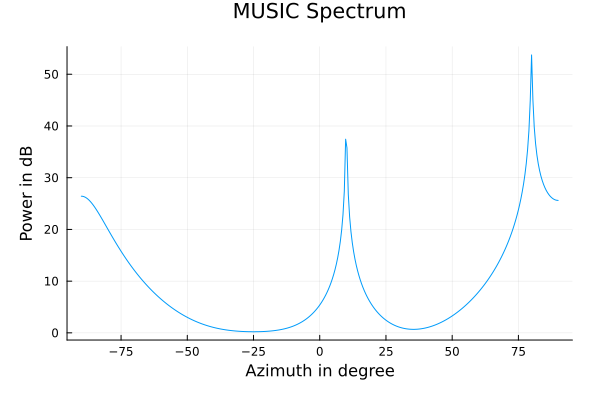

In [6]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")